In [1]:
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import sklearn


In [2]:
import pickle

In [3]:
train_data = pd.read_csv("data/train.csv").fillna(0)
train_data =train_data.sample(frac=1)

In [4]:
test_data = pd.read_csv("data/test.csv").fillna(0)
test_data =test_data.sample(frac=1)

In [5]:
merged_data = pd.concat(
    (train_data, test_data),
    axis=0,
    join="outer")

In [6]:
merged_data.head()

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),# Lane Points,% Observed
4104,04/02/2016 6:00,97,1,100
5437,10/02/2016 21:05,53,1,100
532,05/01/2016 20:20,44,1,100
6631,24/02/2016 0:35,4,1,100
220,04/01/2016 18:20,68,1,100


In [7]:
train_data = merged_data.sample(frac=0.8,random_state=20)
test_data = merged_data.drop(train_data.index)

In [8]:
attribute = 'Lane 1 Flow (Veh/5 Minutes)'
scaler = MinMaxScaler(feature_range=(0, 1)).fit(train_data[attribute].values.reshape(-1, 1))
train_transform = scaler.transform(train_data[attribute].values.reshape(-1, 1)).reshape(1, -1)[0]
test_transform = scaler.transform(test_data[attribute].values.reshape(-1, 1)).reshape(1, -1)[0]
train, test = [], []
delay = 256
for i in range(delay, len(train_transform)):
    train.append(train_transform[i - delay: i + 1])
for i in range(delay, len(test_transform)):
    test.append(test_transform[i - delay: i + 1])
train = np.array(train)
test = np.array(test)
X_train = train[:, :-1]
y_train = train[:, -1]
X_test = test[:, :-1]
y_test = test[:, -1]

In [9]:
y_train

array([0.40512821, 0.34358974, 0.00512821, ..., 0.02564103, 0.51794872,
       0.02564103])

In [10]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))

In [11]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))

In [12]:
X_train.shape

(9421, 256, 1)

In [13]:
X_test.shape

(749, 256, 1)

In [14]:
X_train = tf.transpose(X_train, [0, 2, 1])
X_test = tf.transpose(X_test, [0, 2, 1])

In [15]:
model = models.Sequential()
model = models.Sequential()
model.add(layers.Conv1D(256, 1, activation='softmax', input_shape=(1, 256)))
model.add(tf.keras.layers.LeakyReLU())
model.add(layers.Conv1D(64, 1, activation='softmax',  input_shape=(256, 64)))
model.add(layers.Conv1D(64, 1, activation='softmax',  input_shape=(128, 16)))
model.add(layers.Conv1D(64, 1, activation='softmax',  input_shape=(64, 8)))
model.add(layers.Dropout(.2, input_shape=(4,8)))
model.add(layers.MaxPooling1D(1))
model.add(layers.Conv1D(64, 1, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 256)            65792     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 256)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 64)             16448     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 64)             4160      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 64)             4160      
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)            

In [16]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ["categorical_accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs=10, shuffle=True,verbose=1,
                    validation_data=(X_test, y_test))

In [3]:
pickle.dump(model, open('model', 'wb'))

NameError: name 'model' is not defined

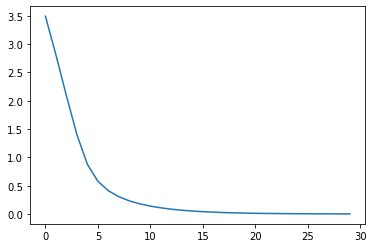

In [72]:
plt.plot(history.history['val_loss'])

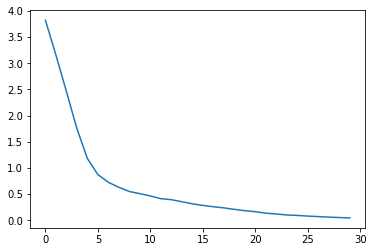

In [73]:
plt.plot(history.history['loss'])

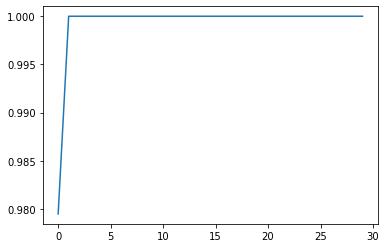

In [74]:
plt.plot(history.history['categorical_accuracy'])

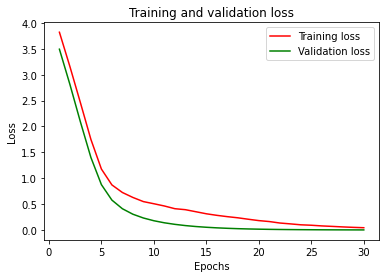

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [130]:
print("on test data")
pred1=model.evaluate(X_test,y_test)
print("accuaracy", str(pred1[1]*100))
print("Total loss",str(pred1[0]*100))

on test data
24/24 [==============================] - 0s 641us/step - loss: 0.0023 - categorical_accuracy: 1.0000
accuaracy 100.0
Total loss 0.2336155390366912


In [109]:
results = model.predict(X_test)
results = results[:, :1, :1].ravel()

In [121]:
y_true = y_true.reshape(y_true.shape[1:])

In [129]:
y_test = y_test.ravel()
sklearn.metrics.confusion_matrix(y_true, results

ValueError: can only convert an array of size 1 to a Python scalar

In [127]:
y_test[:3]

array([0.05583756, 0.50761421, 0.03553299])

In [128]:
results[:3]

array([10.201086, 10.201086, 10.201086], dtype=float32)